# Machine learning for Medicine
## Lab III - Clustering continued: Gaussian Mixtures & Expectation-Maximization Algorithm

*Badis Jaouani - M2 Statistics*
___
In this lab, we are interested in an other clustering method, based on Gaussian Mixtures: the Expectation-Maximization algorithm. It will be tested on several data sets and we will see that the algorithms works well when some conditions are met.


# Table of contents
___
1. [EM Algorithm implementation](#Import)
    - [One-dimensional case](#Import)
    - [Two-dimensional case](#Import)
        - [Data sets](#Import)
        - [EM Algorithm implementation from previous Machine Learning lab](#Import)
        - [Fit the algorithm to detect the clusters](#Import)
2. [EM Algorithm from Scikit-Learn library](#Import)
    - [Best choice of $k$ for the first data set (binary classifcation)](#Import)
    - [Best choice of  $k$ for the second data set (multi-class classifcation)](#Download_data)
    - [Best choice of  $k$ for the third data set (binary classification with non-normally distributed clusters)](#X) 
3. [Back to the Mice and Breast Cancer data sets](#Import)
    - [Mice data set](#Import)
        - [Import & pre-processing](#Import)
        - [Cluster discovery using the EM algorithm](#Import)
    - [Breast Cancer data set](#Download_data)
    
4. [Conclusion](#Import)

In [1]:
from mllab import *


Packages:
	nympy as np
	matplotlib.pyplot as plt
	seaborn as sns

Functions:
	plotXY
	plot_frontiere
	map_regions
	covariance
	plot_cov
	sample_gmm
	scatter
	plot_level_set
	gaussian_sample



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set_style('whitegrid')

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%config InlineBackend.figure_format = 'retina'

from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification, make_blobs, make_moons

# I. EM Algorithm implementation
___
## 1) One-dimensional case

In [3]:
mu1, sigma1 = 0, 0.3 # mean and standard deviation 
s1 = np.random.normal(mu1, sigma1, 100)
y1 = np.repeat(0, 100)
mu2, sigma2 = 2, 0.3 # mean and standard deviation 
s2 = np.random.normal(mu2, sigma2, 100)
y2 = np.repeat(1, 100)
mu = [mu1, mu2]
sigma = [sigma1, sigma2]
data = np.concatenate([s1,s2]) 
y = np.concatenate([y1,y2])

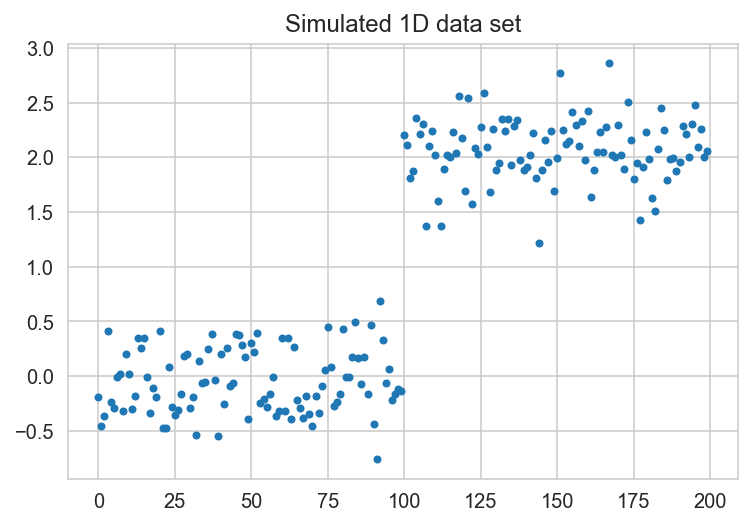

In [4]:
plt.plot(data, '.')
plt.title('Simulated 1D data set');

In [5]:
def pr_single_comp(mu, sigma, x): 
    prob = []
    for i in range(0, x.shape[0]) : 
        prob.append(np.exp(-0.5*((x[i,]-mu)/sigma)**2)/sigma)
    return prob

In [6]:
def pr_single_normalized(mu,sigma, x):
    unnorm_prob = pr_single_comp(mu, sigma, x)
    normalization = np.sum(pr_single_comp(mu, sigma, x), axis=1) 
    prob = []
    for i in range(0, len(unnorm_prob)) :
        prob.append(unnorm_prob[:][i]/normalization[i])
    return prob

In [7]:
def update_mu(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x) 
    hat_mu = [0, 0]
    for i in range(0, len(prob)) :
        hat_mu = hat_mu + prob[i][:]*x[i,]
    hat_mu = hat_mu/np.sum(pr_single_normalized(mu, sigma, x), axis=0) 
    return hat_mu

In [8]:
def update_sigma(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x) 
    hat_sigma = [0, 0]
    for i in range(0, len(prob)) :
        hat_sigma = hat_sigma + prob[i][:]*(x[i,] - mu)**2
    hat_sigma = hat_sigma/np.sum(pr_single_normalized(mu, sigma, x), axis=0) 
    return hat_sigma

In [9]:
mu_old = [np.random.uniform(-2, 2), np.random.uniform(0, 4)] 
sigma_old = [0.3, 0.3]
NbIter = 10

In [10]:
for iter in range(1, NbIter):
    hat_mu = update_mu(data,mu_old,sigma_old) 
    hat_sigma = update_sigma(data,mu_old,sigma_old) 
    print('iter', iter)
    print('updated mu = ',hat_mu)
    print('updated sigma = ',hat_sigma)
    mu_old = hat_mu
    sigma_old = hat_sigma + 1e-13

iter 1
updated mu =  [-0.04629605  2.06958325]
updated sigma =  [0.75771291 1.32600653]
iter 2
updated mu =  [0.0412297  1.80658978]
updated sigma =  [0.27440376 0.6372264 ]
iter 3
updated mu =  [-0.05802294  2.02599523]
updated sigma =  [0.09144078 0.20217715]
iter 4
updated mu =  [-0.05444692  2.05537599]
updated sigma =  [0.08133587 0.10150533]
iter 5
updated mu =  [-0.04705123  2.06907804]
updated sigma =  [0.08597962 0.08287344]
iter 6
updated mu =  [-0.04705123  2.06907804]
updated sigma =  [0.08592493 0.08268569]
iter 7
updated mu =  [-0.04705123  2.06907804]
updated sigma =  [0.08592493 0.08268569]
iter 8
updated mu =  [-0.04705123  2.06907804]
updated sigma =  [0.08592493 0.08268569]
iter 9
updated mu =  [-0.04705123  2.06907804]
updated sigma =  [0.08592493 0.08268569]


**Conclusion**: The returned means are very close from the original ones, which means the algorithm finds the right clusters.

## 2) Two-dimensional case
### 2.1) Data sets

In [11]:
# Fisrt dataset
X1, y1 = make_classification(n_samples = 200, n_features = 2, 
                             n_informative = 2, n_classes = 2,
                             n_clusters_per_class = 1, n_redundant = 0, random_state = 0)
# Second dataset
X2, y2 = make_blobs(n_samples = 200, n_features = 2, 
                    centers = 3, random_state = 0)
# Third dataset
X3, y3 = make_moons(n_samples = 200, noise = 0.08, random_state = 0)

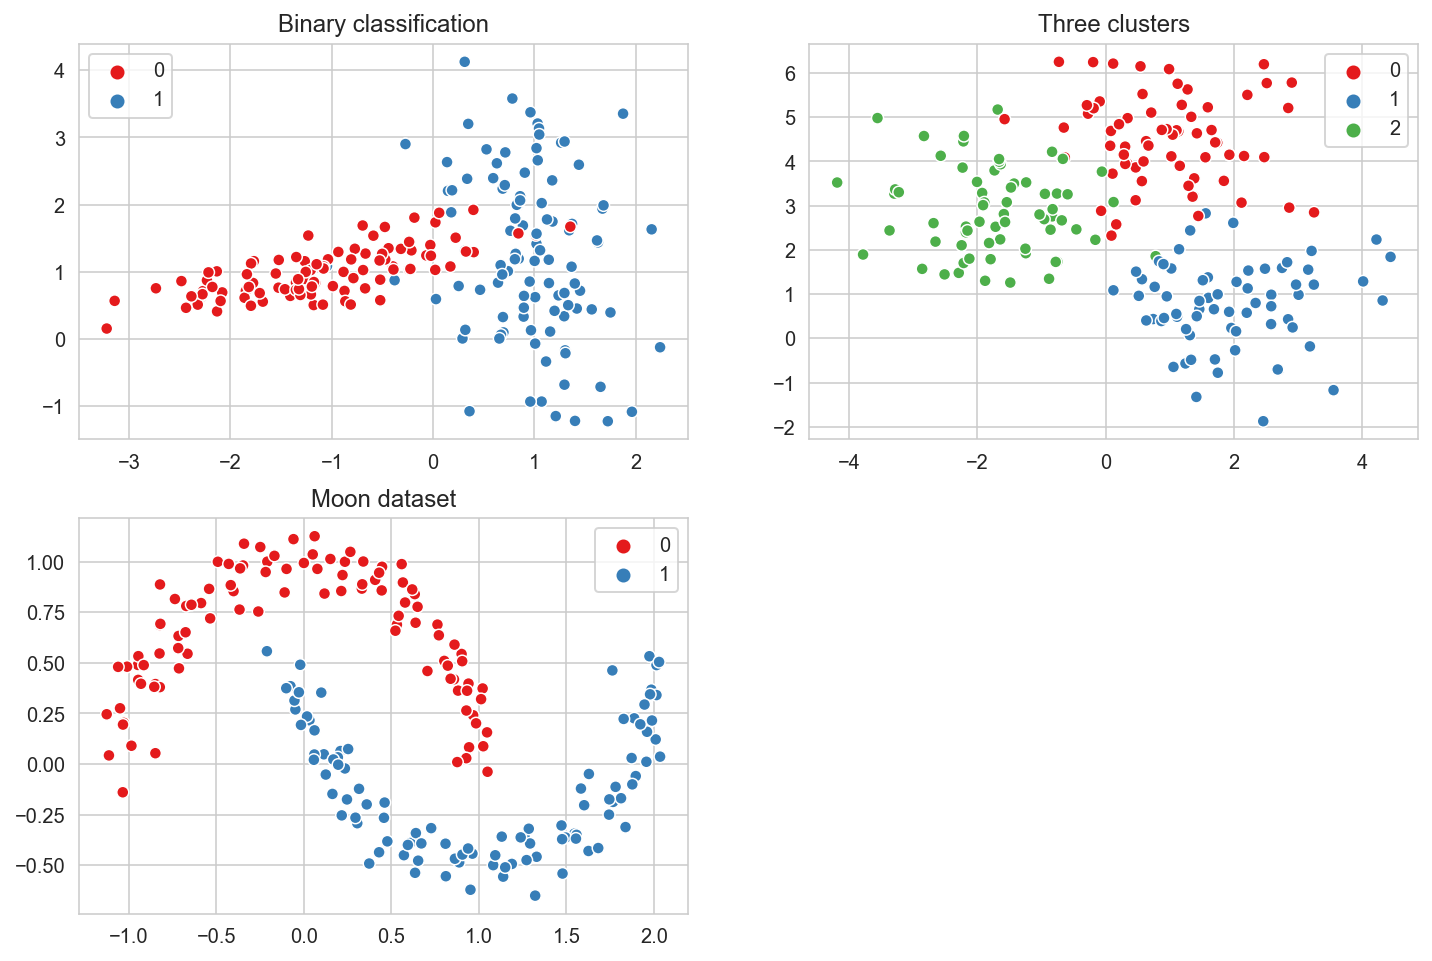

In [12]:
plt.figure(figsize = (12,8))
plt.subplot(221)
sns.scatterplot(X1[:,0], X1[:,1], hue = y1, palette = 'Set1')
plt.title('Binary classification')

plt.subplot(222)
sns.scatterplot(X2[:,0], X2[:,1], hue = y2, palette = 'Set1')
plt.title('Three clusters');

plt.subplot(223)
sns.scatterplot(X3[:,0], X3[:,1], hue = y3, palette = 'Set1')
plt.title('Moon dataset');

### 2.2) EM Algorithm implementation from previous Machine Learning lab

We will use the following implementation of the algorithm, suggested in Mr. Maxime Sangnier's lab on Clustering.

In [13]:
class EM(object):
    def __init__(self, n_components=1, n_iter=100):
        self.n_components = n_components
        self.n_iter = n_iter
    
    def fit(self, X):
        # Initialization
        n_components = self.n_components
        
        weights = [1/n_components] * n_components  # List of initial weights
        #means = [np.random.rand(X.shape[1]) * (X.max(axis=0)-X.min(axis=0)) + X.min(axis=0)
        #        for k in range(n_components)]
        
        means = np.random.permutation(X)[:n_components]  # List of initial means
        # (initial means can be taken at random among the training points)
        
        covariances = [np.eye(X.shape[1]) for k in range(n_components)]  # List of initial
        # covariance matrices
        
        # Multivariate Gaussian pdf
        def pdf(X, mean, cov):
            invcov = np.linalg.inv(cov + 1e-6*np.eye(cov.shape[0]))
            r = np.exp(-0.5*np.diag((X-mean).dot(invcov.dot((X-mean).T))))
            r *= np.sqrt(np.linalg.det(invcov/(2*np.pi)))
            return r
            
        # Loop
        log_likelihood = []  # Marginal log-likelihood at each iteration
        em_log_likelihood = []  # Average joint log-likelihood at each iteration
        for it in range(self.n_iter):
            # Parameter update
            # Matrix of joint density values (size #components x #points)
            joint_density = np.array([w * pdf(X, m, c)
                                      for w, m, c in zip(weights, means, covariances)])
            p = joint_density / joint_density.sum(axis=0)  # Conditional probabilities
            weights = p.mean(axis=1)  # Prior probabilities
            means = p.dot(X) / p.sum(axis=1)[:, np.newaxis]  # Means
            covariances = [(X-m).T.dot(np.diag(w).dot(X-m)) / w.sum()
                           for w, m in zip(p, means)]  # List of covariance matrices
            
            # Log-likelihood computation
            log_likelihood.append(np.log(joint_density.sum(axis=0)).sum())
            em_log_likelihood.append(np.sum(p * np.log(joint_density)))
        self.weights_ = np.array(weights)
        self.means_ = np.array(means)
        self.covariances_ = np.array(covariances)
        self.log_likelihood_ = log_likelihood
        self.em_log_likelihood_ = em_log_likelihood

### 2.3) Fit the algorithm to detect the clusters

In [14]:
iter_max = 50

clus1 = EM(n_components = 2, n_iter = iter_max)
clus1.fit(X1)
clus2 = EM(n_components = 3, n_iter = iter_max)
clus2.fit(X2)
clus3 = EM(n_components = 2, n_iter = iter_max)
clus3.fit(X3)

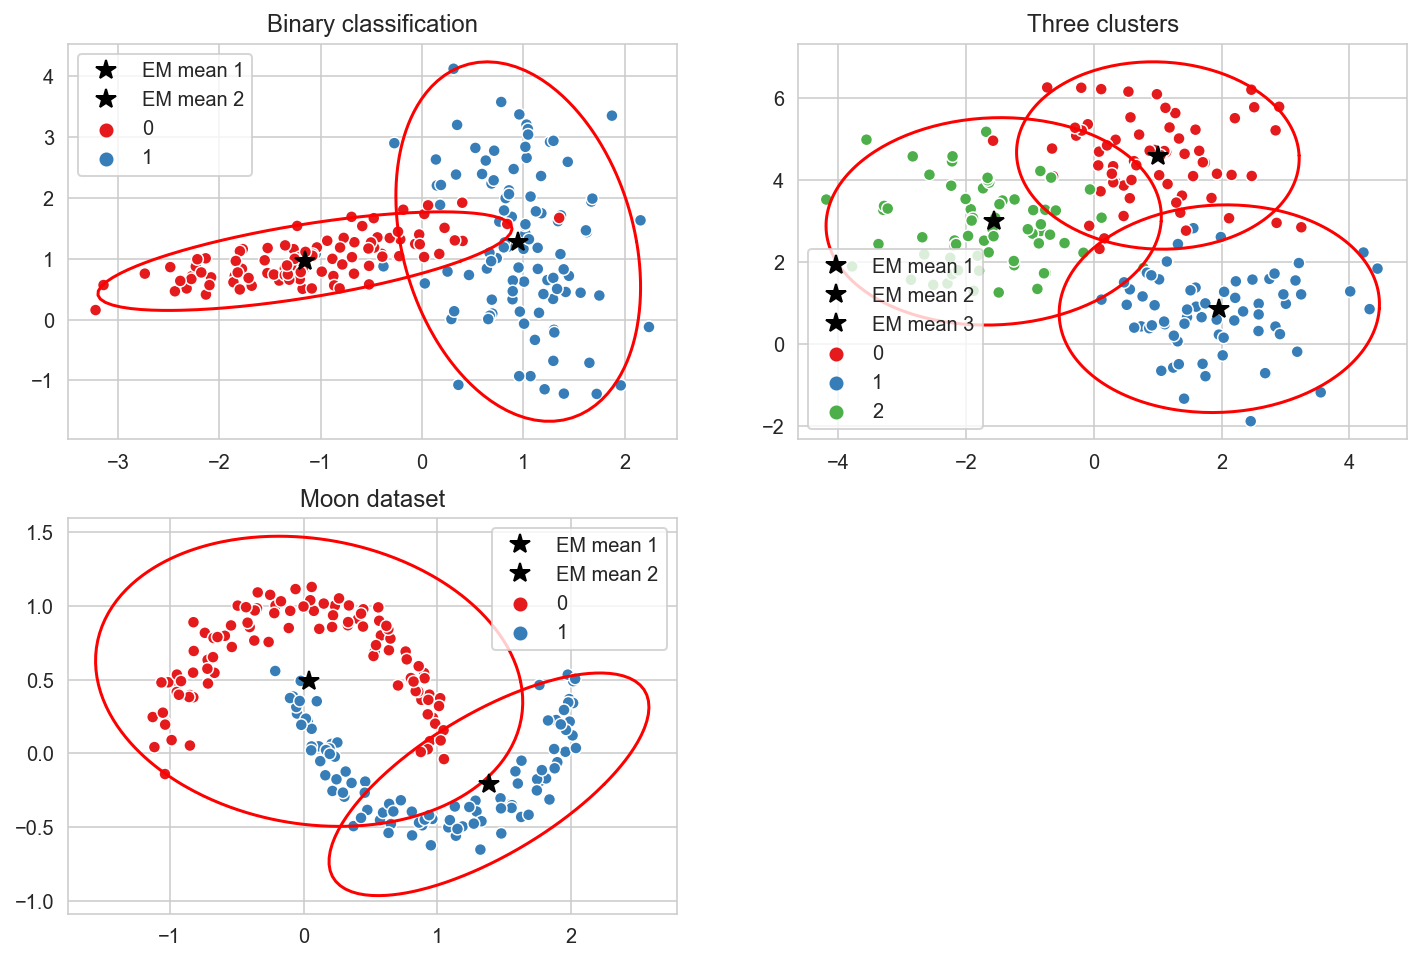

In [15]:
plt.figure(figsize = (12,8))
plt.subplot(221)
sns.scatterplot(X1[:,0], X1[:,1], hue = y1, palette = 'Set1')
for (mean, cov, k) in zip(clus1.means_, clus1.covariances_, np.arange(1,4)):
    plt.plot(mean[0], mean[1], 'r*', markersize=10, color = 'black', label = 'EM mean {}'.format(k))
    plot_cov(cov, mean)
plt.legend()
plt.title('Binary classification')

plt.subplot(222)
sns.scatterplot(X2[:,0], X2[:,1], hue = y2, palette = 'Set1')
for (mean, cov, k) in zip(clus2.means_, clus2.covariances_, np.arange(1,4)):
    plt.plot(mean[0], mean[1], 'r*', markersize=10, color = 'black', label = 'EM mean {}'.format(k))
    plot_cov(cov, mean)
plt.legend()
plt.title('Three clusters');

plt.subplot(223)
sns.scatterplot(X3[:,0], X3[:,1], hue = y3, palette = 'Set1')
for (mean, cov, k) in zip(clus3.means_, clus3.covariances_, np.arange(1,4)):
    plt.plot(mean[0], mean[1], 'r*', markersize=10, color = 'black', label = 'EM mean {}'.format(k))
    plot_cov(cov, mean)
plt.legend()
plt.title('Moon dataset');

In the case 3, where the data points are not normally distributed, the EM algorithm fails to correctly assign the data to the correct groups. However, in the 2 other ceses, the means that are returned by the algorithm approximatively correspond to the cluster centers. 

Looking back to the simulation of the first two data sets, the points are by definition normally distributed, which explains the high performance of the EM algorithm. In the case 2, where some overlap exists between the points with different labels, some points are attributed to the wrong groups.

Let us explore the log-likelihoods, in order to evaluate the algorithm's performance.

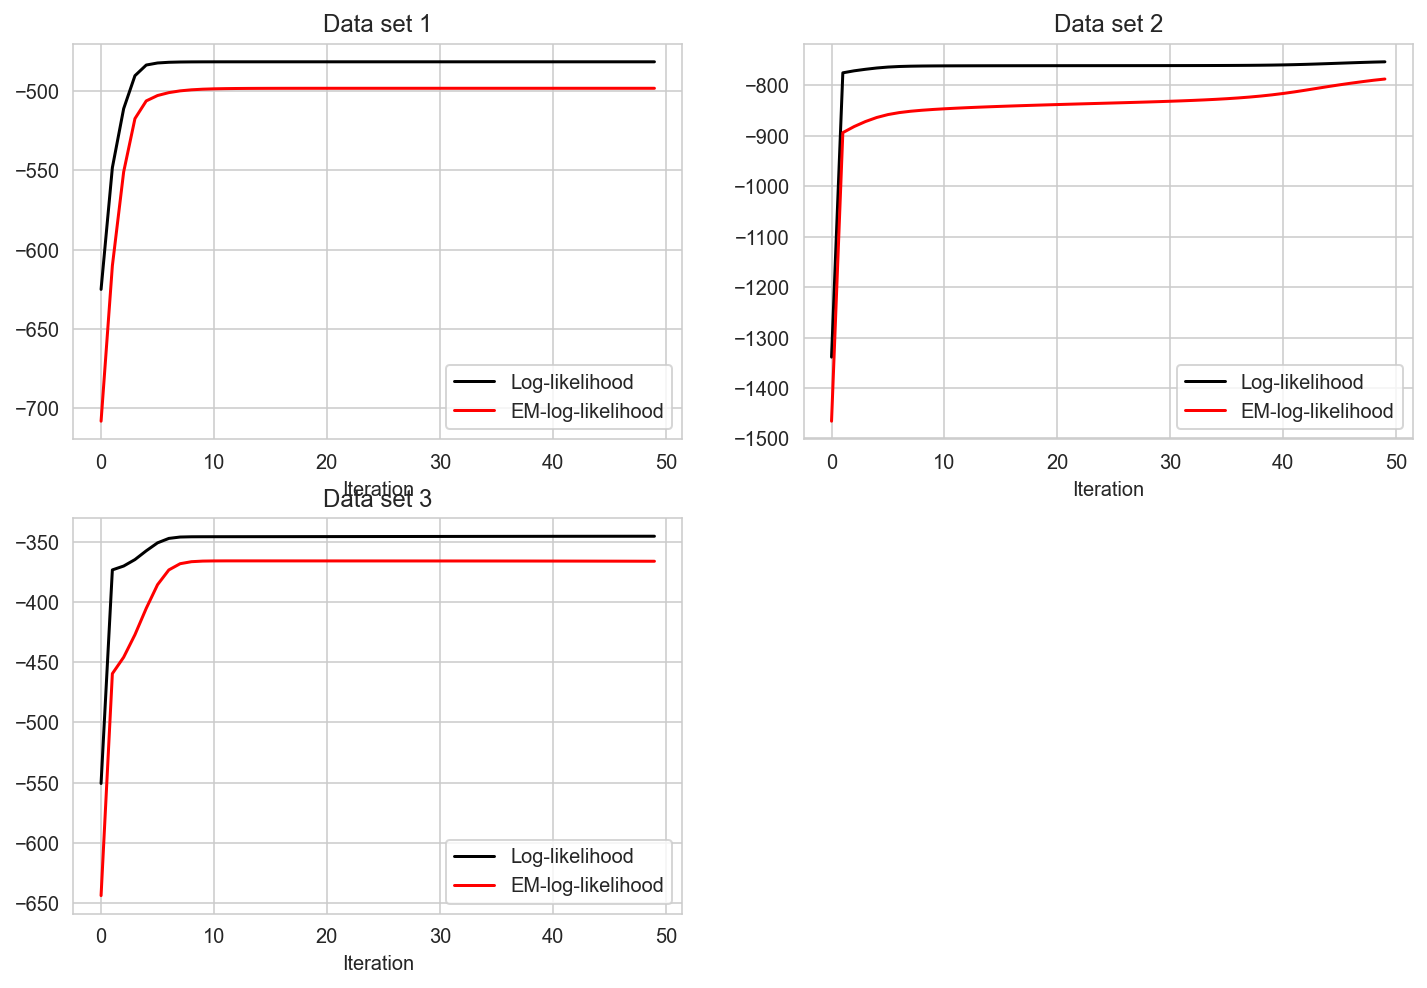

In [16]:
plt.figure(figsize = (12,8))
plt.subplot(221)
plt.plot(clus1.log_likelihood_, label="Log-likelihood", color = 'black')
plt.plot(clus1.em_log_likelihood_, label="EM-log-likelihood", color = 'red')
plt.title('Data set 1')
plt.xlabel("Iteration")
plt.legend(loc="best");

plt.subplot(222)
plt.plot(clus2.log_likelihood_, label="Log-likelihood", color = 'black')
plt.plot(clus2.em_log_likelihood_, label="EM-log-likelihood", color = 'red')
plt.title('Data set 2')
plt.xlabel("Iteration")
plt.legend(loc="best");

plt.subplot(223)
plt.plot(clus3.log_likelihood_, label="Log-likelihood", color = 'black')
plt.plot(clus3.em_log_likelihood_, label="EM-log-likelihood", color = 'red')
plt.title('Data set 3')
plt.xlabel("Iteration")
plt.legend(loc="best");

The log-likelihoods returned for DS1 are very close, suggesting the high performance of the algorithm. For DS 2&3, larger gaps are observed, since the algorithm attributes some points to the wrong groups.

In what follows, we explore the Scikit-Learn's version of the EM algorithm, coded in `mixture.GaussianMixture`.

# II. EM Algorithm from Scikit-Learn library
___
The scheme below uses the Bayesian Information Criterion (BIC) to select the best number $k$ of clusters, the lowest the BIC, better is the choice of $k$.

## 1) Best choice of $k$ for the first data set (binary classifcation)

In [17]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types, best_gmm_cv_type = ['spherical', 'tied', 'diag', 'full'], [] 
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type = cv_type) 
        gmm.fit(X1) 
        bic.append(gmm.bic(X1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1] 
            best_gmm = gmm
    best_gmm_cv_type.append(best_gmm) 

In [18]:
means = [k.means_ for k in best_gmm_cv_type]
covariances = [k.covariances_ for k in best_gmm_cv_type]

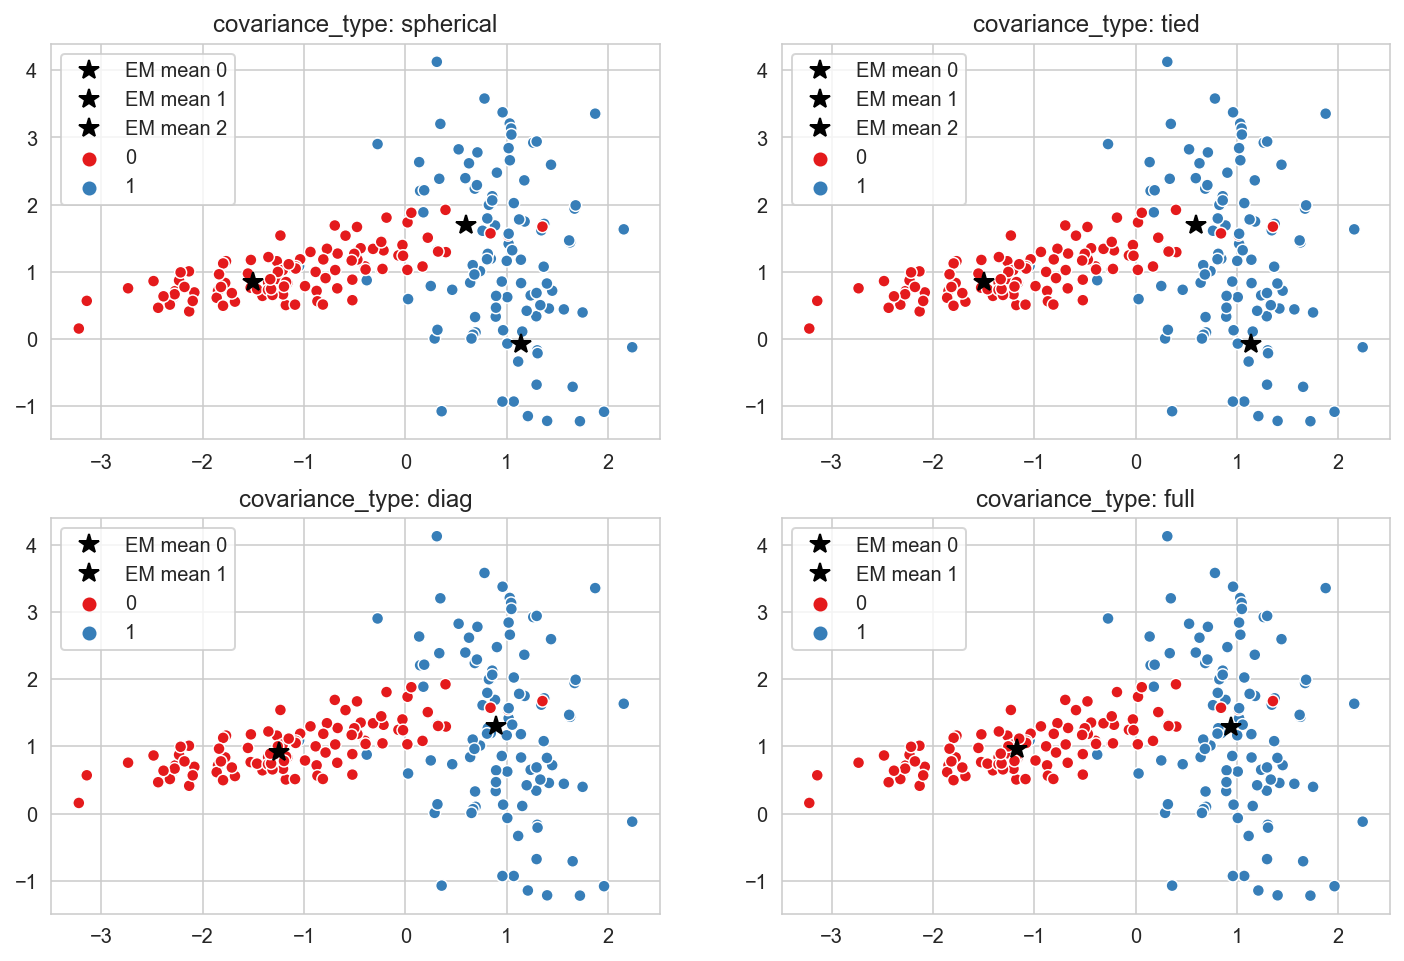

In [19]:
plt.figure(figsize = (12,8))
for mea, fig in zip(means, np.arange(1,5)):
    plt.subplot(2,2,fig)
    sns.scatterplot(X1[:,0], X1[:,1], hue = y1, palette = 'Set1')
    for (k,mean) in enumerate(mea):
        plt.plot(mean[0], mean[1], 'r*', markersize=10, color = 'black', label = 'EM mean {}'.format(k))
    plt.legend()
    plt.title('covariance_type: {}'.format(cv_types[fig-1]))

We can see that the best results are obtained for full and diagonal covariance type, since they consider much of the information that is contained in the date. If we consider the tied mode, all the elements share the same covariance matrix, which leads in a loss of information and thus a wrong number of discovered clusters. 

Let us now explore the case of multi-class classification, where we use a similar scheme for cluster discovery.
## 2) Best choice of  $k$ for the second data set (multi-class classifcation)

In [20]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types, best_gmm_cv_type = ['spherical', 'tied', 'diag', 'full'], [] 
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type = cv_type) 
        gmm.fit(X2) 
        bic.append(gmm.bic(X2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1] 
            best_gmm = gmm
    best_gmm_cv_type.append(best_gmm) 

In [21]:
means = [k.means_ for k in best_gmm_cv_type]
covariances = [k.covariances_ for k in best_gmm_cv_type]

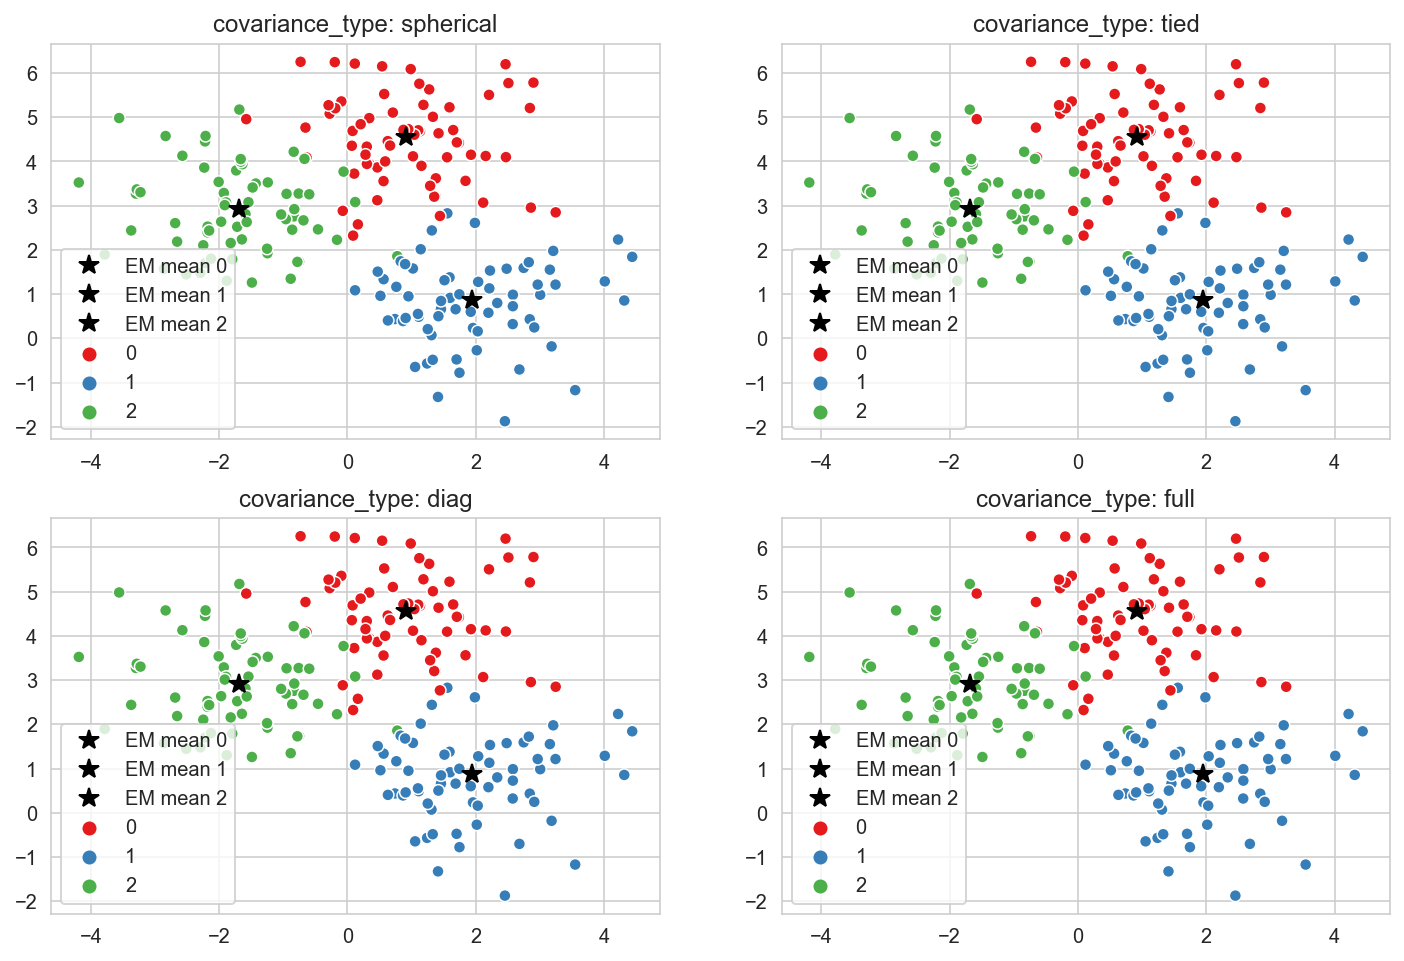

In [22]:
plt.figure(figsize = (12,8))
for mea, fig in zip(means, np.arange(1,5)):
    plt.subplot(2,2,fig)
    sns.scatterplot(X2[:,0], X2[:,1], hue = y2, palette = 'Set1')
    for (k,mean) in enumerate(mea):
        plt.plot(mean[0], mean[1], 'r*', markersize=10, color = 'black', label = 'EM mean {}'.format(k))
    plt.legend()
    plt.title('covariance_type: {}'.format(cv_types[fig-1]))

The four modes lead to the same result, that is detecting $k = 3$ clusters, in accordance with the original labels. The overlaps are, here again, not well detected, leading to a some points which are wrongly attributed to the classes. 

The following case is the moon data set, or the hard one for most of clustering algorithms.
## 3) Best choice of  $k$ for the third data set (binary classification with non-normally distributed clusters)

In [23]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types, best_gmm_cv_type = ['spherical', 'tied', 'diag', 'full'], [] 
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type = cv_type) 
        gmm.fit(X3) 
        bic.append(gmm.bic(X3))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1] 
            best_gmm = gmm
    best_gmm_cv_type.append(best_gmm) 

In [24]:
means = [k.means_ for k in best_gmm_cv_type]
covariances = [k.covariances_ for k in best_gmm_cv_type]

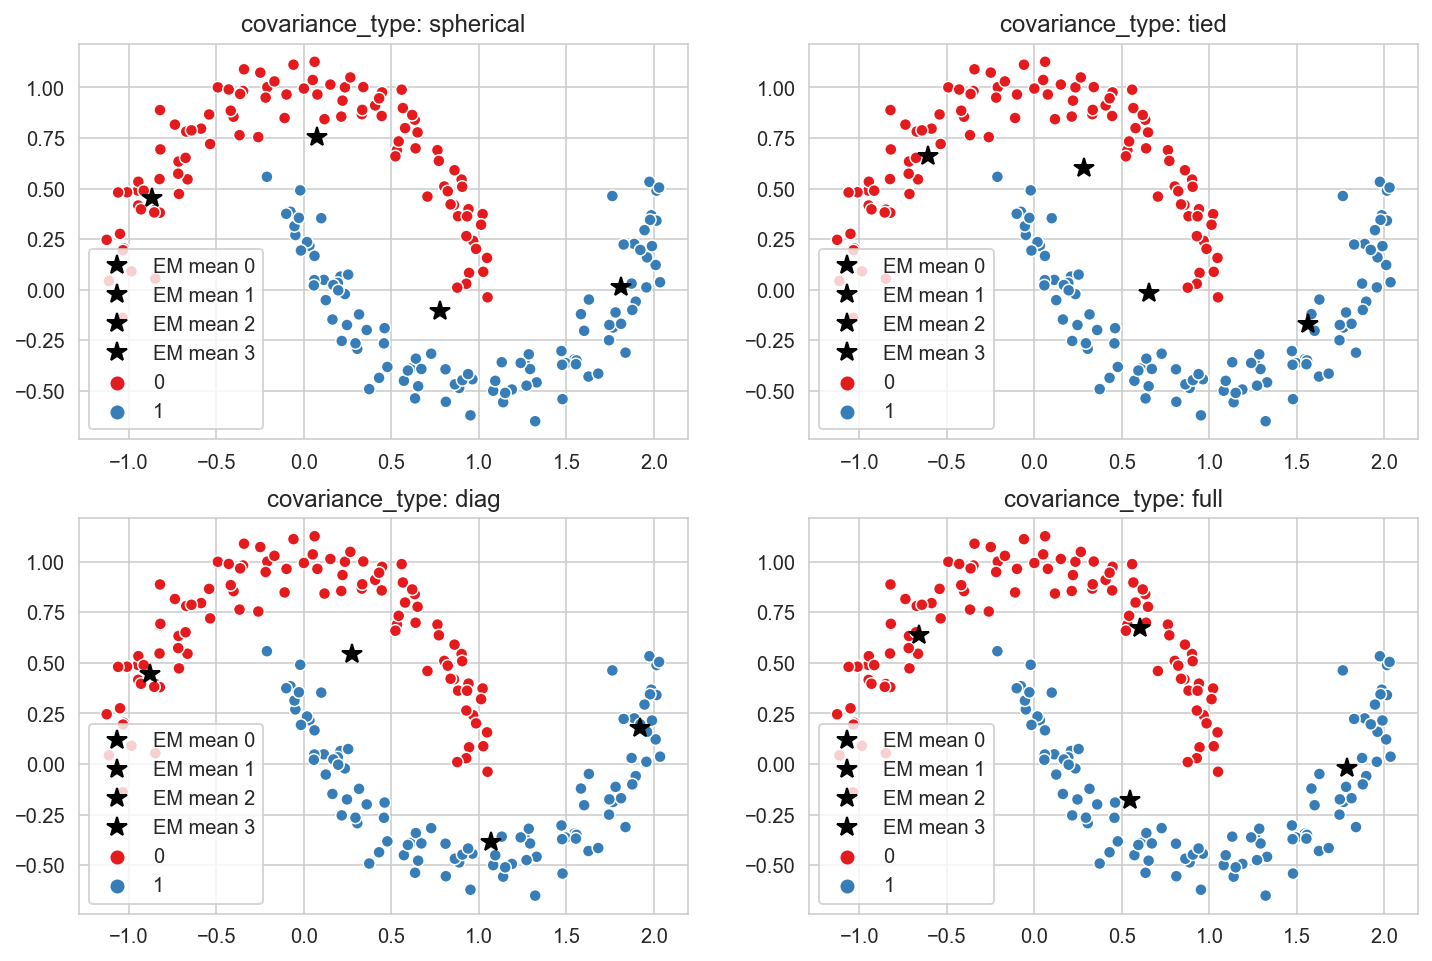

In [25]:
plt.figure(figsize = (12,8))
for mea, fig in zip(means, np.arange(1,5)):
    plt.subplot(2,2,fig)
    sns.scatterplot(X3[:,0], X3[:,1], hue = y3, palette = 'Set1')
    for (k,mean) in enumerate(mea):
        plt.plot(mean[0], mean[1], 'r*', markersize=10, color = 'black', label = 'EM mean {}'.format(k))
    plt.legend()
    plt.title('covariance_type: {}'.format(cv_types[fig-1]))

As seen in the figures above, $k = 4$ is the number of clusters leading to the lowest BIC. This means the algorithm fails in detecting the right number and thus to correctly assign the points to their right group. 

**Conclusion**: Exploring the previous 'simple' data sets, satisfying the Gaussian assumption (for the data points distribution) turns out to be the crucial condition for having good performances using the EM algorithm, which fits gaussian distributions around the selected means to define the clusters. 

Up to now, only simple data sets ie with small number of features have been explored. Will the EM algorihtm provide satisfying results when large dimensions are considered? We will try to answer this question in the last part of this lab.

# III. Back to the Mice and Breast Cancer data sets
___
## 1) Mice data set
### 1.1) Import & pre-processing

In [26]:
#pip install xlrd

In [27]:
data_mice = pd.read_excel('Data_Cortex_Nuclear.xls', header = 0)
data_mice.drop(columns = ['MouseID'], inplace = True)

In [28]:
display(HTML(
    f"Number of features: {data_mice.shape[1] - 1} <br/>"
    f"Number of experiments: {data_mice.shape[0]} <br/>"))

The dimensionality of this data set is $p = 80$

In [29]:
def missing(df):
    miss = (df.isnull().count() - df.count()).sort_values(ascending = False)
    perc = miss / df.isnull().count()
    data_missing = pd.concat([miss, perc], axis = 1, keys = ['total', 'percentage'])
    return data_missing[data_missing.percentage>0]

In [30]:
# Fast pre processing (similar to the previous lab)
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


# Numerical Preprocessing
num_features = missing(data_mice).index.to_list()
data_mice[num_features] = SimpleImputer(strategy = 'most_frequent').fit_transform(data_mice[num_features])

# Categorical Preprocessing
cat_features = [i for i in data_mice.select_dtypes('object')]
enc = OrdinalEncoder()
data_mice[cat_features] = enc.fit_transform(data_mice[cat_features]);

to_drop = ['class']
y_mice = data_mice['class']
X_mice = data_mice.drop(columns = to_drop)

In [31]:
X_mice.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0.0,0.0,0.0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0.0,0.0,0.0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0.0,0.0,0.0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0.0,0.0,0.0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0.0,0.0,0.0


### 1.2) Cluster discovery using the EM algorithm
The same scheme, which consists of minimizing the BIC, is used to select the best number of clusters.

In [32]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types, best_gmm_cv_type = ['spherical', 'tied', 'diag', 'full'], [] 
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type = cv_type) 
        gmm.fit(X_mice) 
        bic.append(gmm.bic(X_mice))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1] 
            best_gmm = gmm
    best_gmm_cv_type.append(best_gmm) 

For each covariance type mode, we show the number of selected clusters.

In [33]:
best_gmm_cv_type

[GaussianMixture(covariance_type='spherical', n_components=4),
 GaussianMixture(covariance_type='tied', n_components=4),
 GaussianMixture(covariance_type='tied', n_components=4),
 GaussianMixture(n_components=2)]

Without further going into the details, the EM algorithms clearly does not detect the right number of clusters $k = 8$ ie the number of groups into which the mice are split. However, some relevent information could be found in the $2$ or $4$ discovered components, but we don't get into more detailed analysis here.

Do not forget that discovering 8 groups is a hard task for clustering algorithms, that has been shown in the previous lab. Since clustering is a data mining task, it has to be seen as a method that helps discovering patterns in the data, and not to accurately assign each point to its label. The latter is the object of Supervised Learning, which proved to be very efficient. 

In relationship with the dimensionality of the data $p = 80$, the EM algorithm seems to be affected as the dimension grows. This is known by the curse of dimensionality. 

Finally, let us take a closer look into two features and plot their distributions.

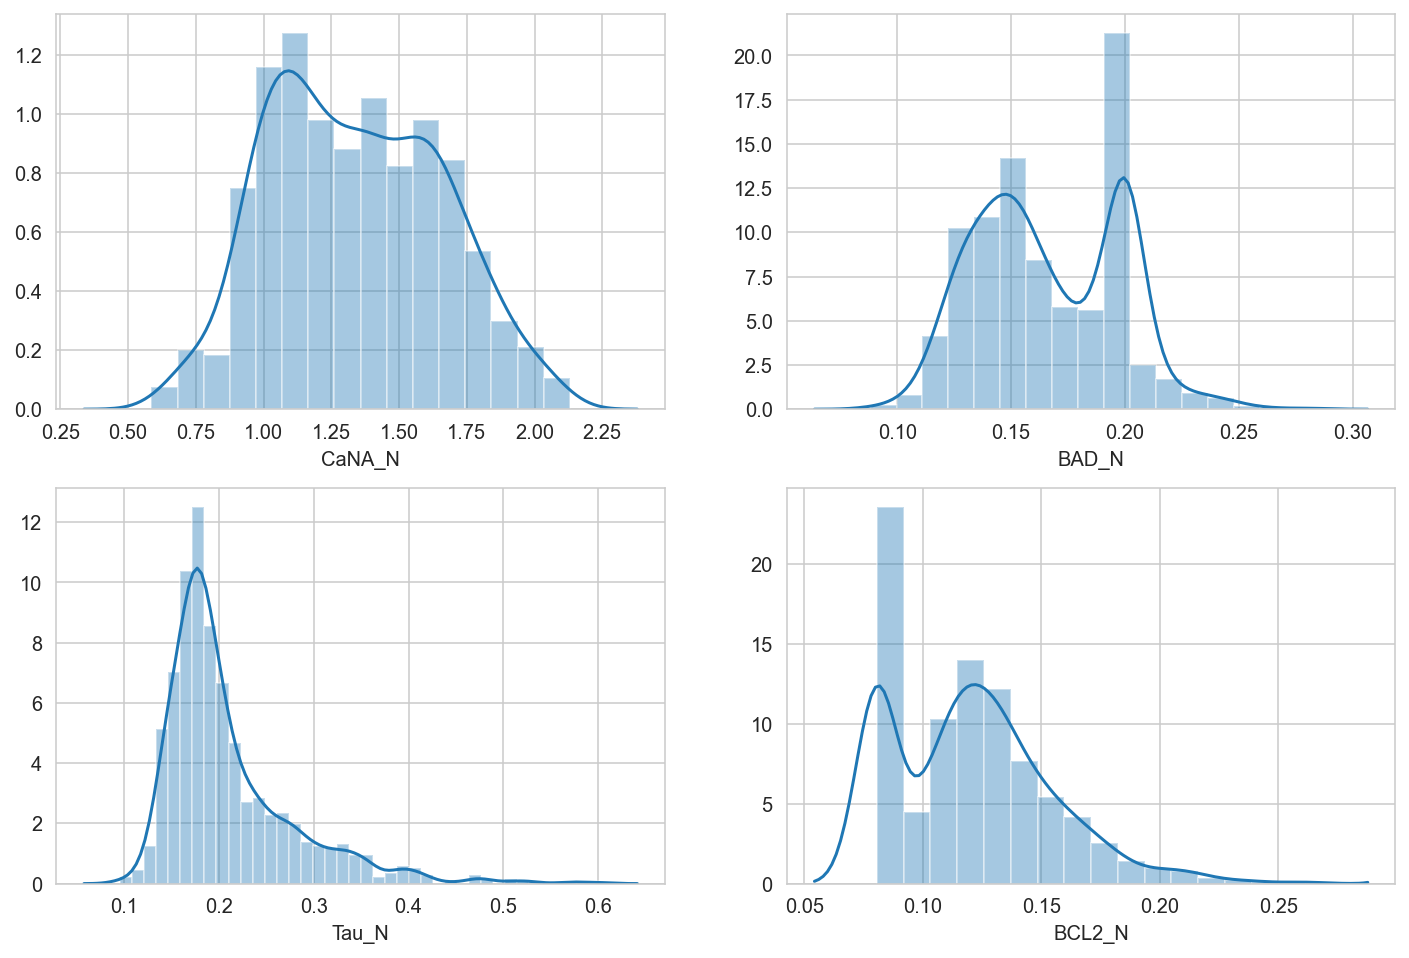

In [34]:
plt.figure(figsize = (12,8))
plt.subplot(221)
sns.distplot(X_mice['CaNA_N'], kde = True)

plt.subplot(222)
sns.distplot(X_mice['BAD_N'], kde = True)

plt.subplot(223)
sns.distplot(X_mice['Tau_N'], kde = True)

plt.subplot(224)
sns.distplot(X_mice['BCL2_N'], kde = True);

It clearly appears that the Gaussian assumption is violated. Since the algorithms fits gaussian distributions around its cluster's centers, this means that many errors will be committed during the learning process, which leads to a non-correct number of clusters. 

To conclude with this lab, let us explore the BC data set, which has a lower dimension the the Mice's.

## 2) Breast Cancer data set

During the previous lab, this data set was considered as being easier than the Mice's, since it treats a binary classification problem.

In [35]:
breast_cancer = pd.read_table('BreastDiagnostic.txt', sep = ',', header = None)

In [36]:
display(HTML(
    f"Number of attributes: {breast_cancer.shape[1] - 2} <br/>"
    f"Number of patients: {breast_cancer.shape[0]} <br/>"))

The dimensionality is $p = 30$.

The same scheme is applied to select the best number of clusters ie minimizing the BIC.

In [37]:
# Fast pre processing (similar to the previous lab)
from sklearn.preprocessing import minmax_scale

y_bc = breast_cancer.loc[:,1]
X_bc = breast_cancer.drop(columns = [0,1])
X_bc = pd.DataFrame(minmax_scale(X_bc))
enc = OrdinalEncoder()
breast_cancer.loc[:,1] = enc.fit_transform(breast_cancer.loc[:,1].to_numpy().reshape(-1,1))

In [38]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types, best_gmm_cv_type = ['spherical', 'tied', 'diag', 'full'], [] 
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type = cv_type) 
        gmm.fit(X_bc) 
        bic.append(gmm.bic(X_bc))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1] 
            best_gmm = gmm
    best_gmm_cv_type.append(best_gmm) 

We display the obtained models, the last one selects the correct number of clesters, which is very interesting.

In [39]:
best_gmm_cv_type

[GaussianMixture(covariance_type='spherical', n_components=9),
 GaussianMixture(covariance_type='tied', n_components=8),
 GaussianMixture(covariance_type='tied', n_components=8),
 GaussianMixture(n_components=2)]

Let us further explore what we obtained. We compute the means squared error between the cluster centers, and the mean data point of each original group. 

First, we display the obtaines two cluster centers by applying the EM algorithm.

In [40]:
best_gmm_cv_type[3].means_

array([[0.49053206, 0.39427521, 0.49010446, 0.35007248, 0.45214179,
        0.39804595, 0.39184721, 0.4383704 , 0.44236688, 0.28905762,
        0.17932167, 0.18838402, 0.16897436, 0.12194491, 0.17392564,
        0.25062712, 0.12142661, 0.29659058, 0.18603153, 0.13084298,
        0.46429673, 0.44997969, 0.44942342, 0.30039061, 0.48175944,
        0.34914979, 0.37554935, 0.62895974, 0.33224556, 0.25444016],
       [0.24717342, 0.28193486, 0.23898172, 0.13732371, 0.36049726,
        0.17843785, 0.09819236, 0.12642945, 0.34208754, 0.25921372,
        0.06272091, 0.18988597, 0.05777139, 0.02718175, 0.18541915,
        0.12889418, 0.05609814, 0.17973414, 0.17342808, 0.08187079,
        0.19645383, 0.3126003 , 0.18373471, 0.09350248, 0.3577369 ,
        0.14313557, 0.12286555, 0.2532825 , 0.22209641, 0.15083332]])

Then, we compute the mean squared error.

In [44]:
# EM center 1 vs. the malighant class
np.mean(np.sum(X_bc[y_bc == 'B'].mean(axis = 0) - best_gmm_cv_type[3].means_[1])**2)

0.00812078116465902

In [45]:
# EM center 2 vs. the benign class
np.mean(np.sum(X_bc[y_bc == 'M'].mean(axis = 0) - best_gmm_cv_type[3].means_[0])**2)

0.01759683731691114

What we see is that the mean squared error is very low for both classes, meaning that the algorithms approximates very well the cluster centers, which leads in a correct cluster discovery. 

Why doe it work well? Take a look into the distribution of 

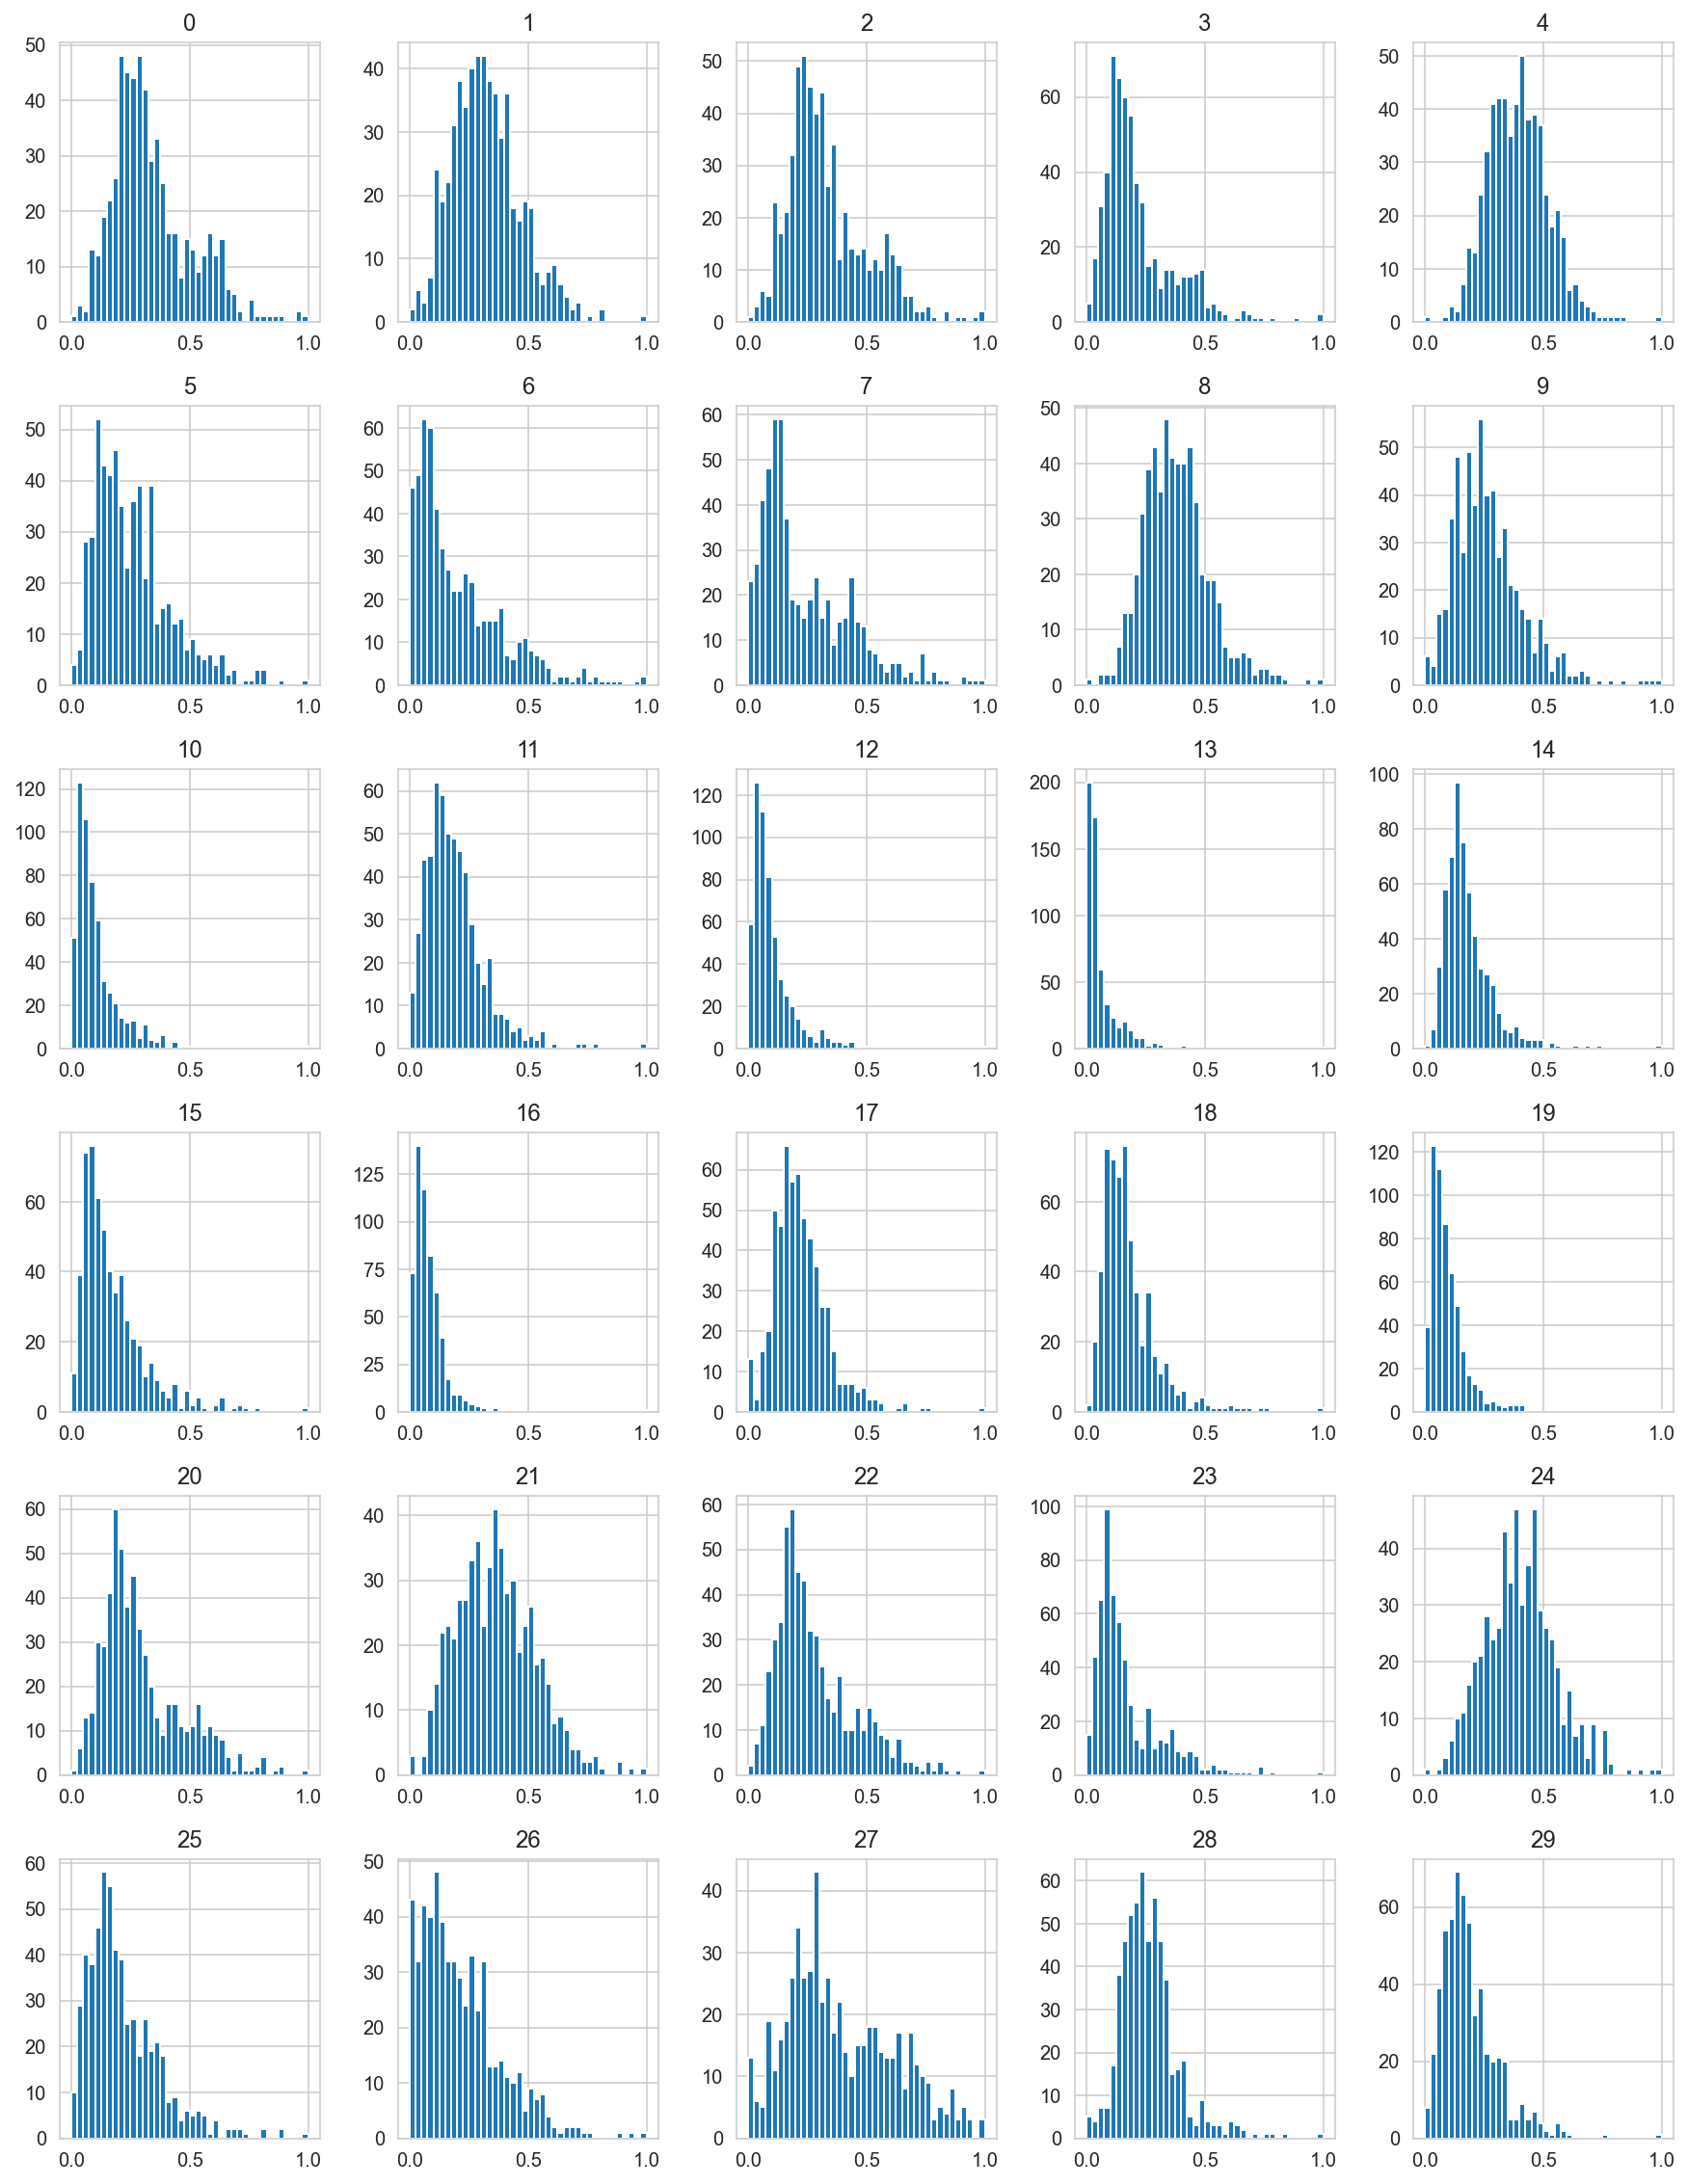

In [43]:
X_bc.hist(bins = 40, figsize = (15,20));

Although some features clearly deviate from the normal distribution, the majority can at least be approximated with a gaussian. This could be a reason behind the success of the EM algorithm with this data set. 

# Conclusion
___
In this lab, the Unsupervised Learning's Expectation-Maximization algorithm was implemented and tested on several data sets. Results suggest good performances in the following cases:
- When the data is normally distributed, since it meets the algorithm's hypothesis for the clusters construction. 
- When the data is low dimensional.

Analysis for the Mice data set, which is high dimensional, shows the inability of the algorithm to provide the correct number of clusters. More detailed analysis showed a clear violation of the Gaussian assumption, which can explain the obtained results, the same issue is observed for the moons data set, where the algorithm was unable to provide a correct clustering.